In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [16]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.03
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 1.20421981,  1.19632108,  2.6560529 ,  3.31912379,  2.12855866,
        4.24533268,  3.63947661,  1.28067724,  6.91279326, 11.45701772])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


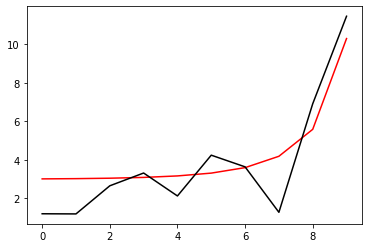

In [17]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [6]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [7]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]]), print(len(Positive))
            else: continue
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [8]:
Positive=NN_func_p(h_real)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [9]:
Negative=NN_func_n(h_real)

In [18]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

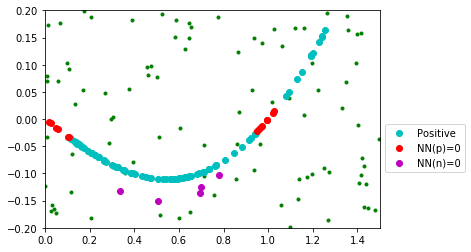

In [19]:
x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [20]:
def Error_func(hh):
    phi0=np.array([v[0] for v in Positive])
    pi0=np.array([v[1] for v in Positive])
    phi1=np.array([v[0] for v in Negative])
    pi1=np.array([v[1] for v in Negative])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [21]:
print(Error_func(h_real))
print(Error_func(h))

tf.Tensor(2.9225183497151, shape=(), dtype=float64)
tf.Tensor(91.25880139249789, shape=(), dtype=float64)


In [22]:
def run():
    with tf.GradientTape() as g:
        loss=Error_func(h) #돌리기전에 Error함수 수정 잊지말것
        gradients=g.gradient(loss, [h])
    optimizer.apply_gradients(zip(gradients, [h]))

100 88.17503022455334
[ 1.29603013  1.28678524  2.74426116  3.40366639  2.20620066  4.29150298
  3.57790501  1.1619055   6.80284225 11.35712161]


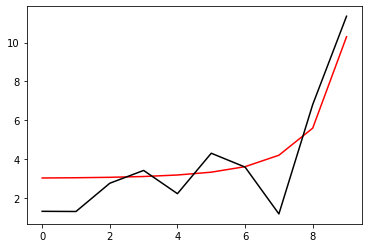

200 83.73818375151008
[ 1.40664227  1.39622291  2.8526848   3.51051369  2.30931718  4.36222367
  3.52212716  1.07046662  6.70398496 11.25706771]


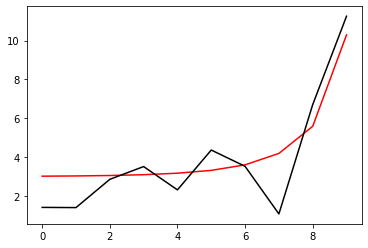

300 80.53171497500425
[ 1.49758112  1.48584662  2.93875174  3.58896092  2.36992855  4.3320989
  3.37665745  0.93084788  6.57338947 11.1568785 ]


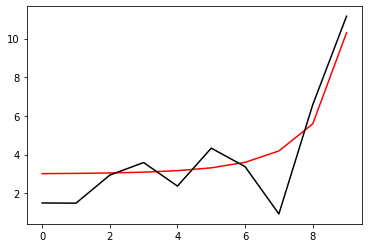

400 76.36972747495614
[ 1.60358438  1.59276806  3.04568119  3.69378319  2.46637489  4.35056785
  3.26568083  0.80908794  6.45077338 11.0562334 ]


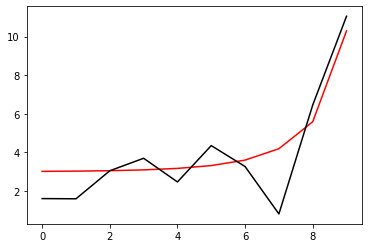

500 72.7795452591165
[ 1.69158063  1.68583444  3.14340199  3.79719979  2.57843048  4.46135233
  3.23898031  0.74357853  6.37251082 10.95571063]


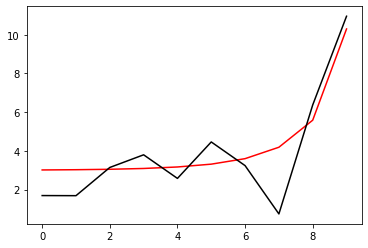

600 70.27572352627915
[ 1.77538492  1.76975907  3.22807105  3.88417804  2.6708631   4.55663735
  3.22903593  0.69519738  6.31222929 10.85598173]


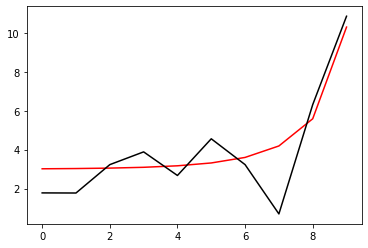

700 61.616762432279785
[ 1.92181275  1.91343248  3.37152969  4.02895013  2.81915155  4.70898982
  3.21386856  0.61007709  6.20768421 10.75655514]


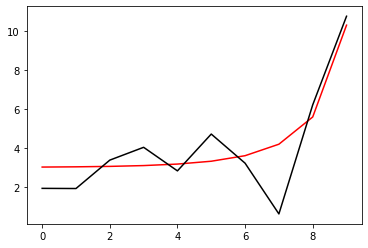

800 15.085827216152538
[ 2.17325089  2.16347424  3.62391589  4.28608203  3.08524395  5.00531518
  3.38848432  0.53767543  6.05509979 10.65668734]


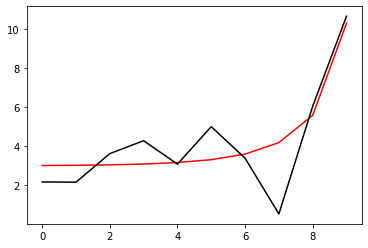

900 12.306702155343409
[ 2.2370046   2.22465542  3.68279668  4.34357439  3.14290464  5.06321194
  3.4423528   0.53017066  6.02084297 10.55645044]


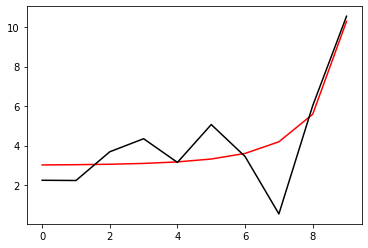

1000 12.110659681284746
[ 2.25470855  2.24113681  3.69763465  4.35752912  3.15748338  5.07665118
  3.45696918  0.53163936  6.01463459 10.45790234]


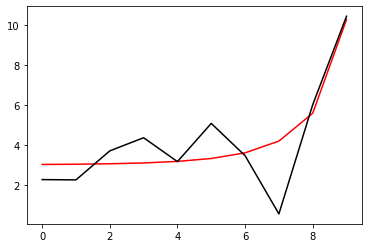

1100 11.69617409849528
[ 2.27770713  2.26276014  3.71765462  4.37701947  3.1785149   5.09908115
  3.48733893  0.54535346  6.01293191 10.36103524]


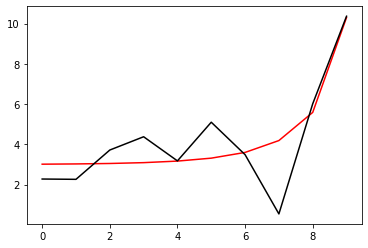

1200 4.331241487571848
[ 2.38374399  2.35972811  3.80789151  4.46301358  3.26392198  5.19033374
  3.59319478  0.58197761  5.99522987 10.26559665]


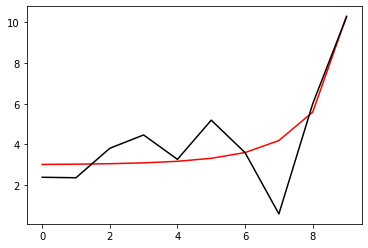

1300 3.1037181964744773
[ 2.4218674   2.39448988  3.83943833  4.49255316  3.29359182  5.21986607
  3.62686897  0.59330572  5.98814332 10.17118544]


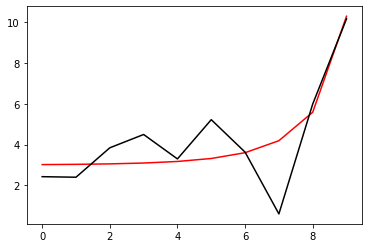

1400 3.085699913564962
[ 2.42736419  2.40001174  3.84405438  4.49703163  3.2997192   5.22507124
  3.63606248  0.59990611  5.98890727 10.07803521]


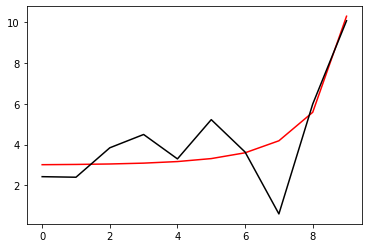

1500 3.074548082844651
[2.43136863 2.40432017 3.84761938 4.50066409 3.3053404  5.22998454
 3.6459279  0.60806734 5.99074568 9.98610217]


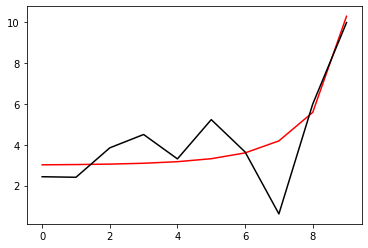

1600 3.0623894751774263
[2.43521278 2.40866309 3.85134156 4.50465527 3.31171024 5.23611955
 3.65854238 0.61908638 5.99384489 9.89531714]


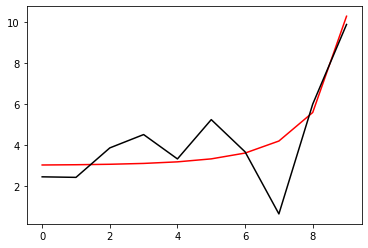

1700 3.0416057002929042
[2.43989827 2.41406533 3.8563089  4.5102058  3.32022978 5.24542794
 3.677095   0.63556435 5.99907374 9.80563678]


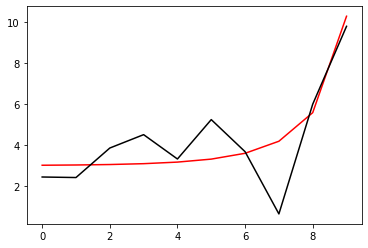

1800 2.9746596543809183
[2.447858   2.42314007 3.86542698 4.5206637  3.33496368 5.26383805
 3.71164549 0.66617216 6.00964169 9.71706413]


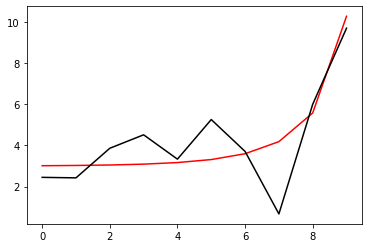

1900 2.28867568081161
[2.47252522 2.45047651 3.89510418 4.55512224 3.37923653 5.32549183
 3.81816113 0.76088024 6.04577227 9.62978839]


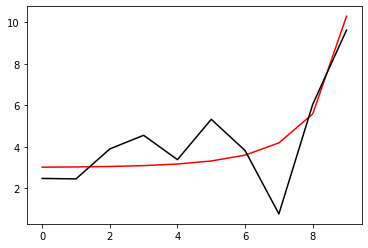

2000 1.5205276993693024
[2.50116153 2.4825106  3.93051748 4.59691894 3.4333462  5.40226191
 3.94547913 0.88000449 6.09802541 9.54440579]


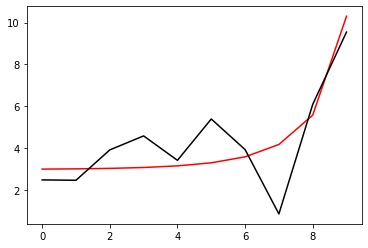

2100 1.1867201811612353
[2.519702   2.50364753 3.95369283 4.62457883 3.47038428 5.4539831
 4.03037264 0.9621213  6.13719835 9.46084558]


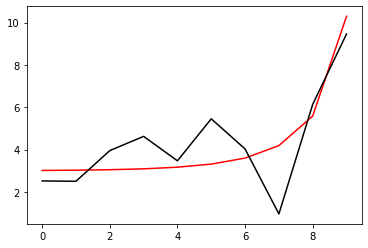

2200 1.074149265137509
[2.5310442  2.51678305 3.96750012 4.64090978 3.49312845 5.48377289
 4.07942372 1.00967408 6.1598176  9.37861357]


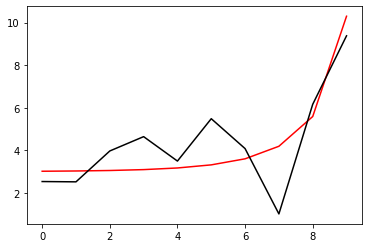

2300 1.0334135685932035
[2.53611124 2.52349615 3.97440608 4.64967854 3.50738508 5.50200025
 4.11224316 1.04342956 6.17672199 9.29742776]


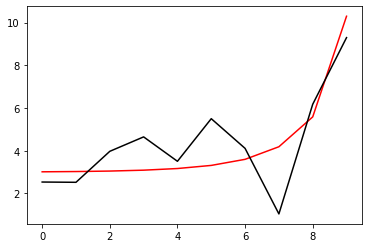

2400 1.0272871243493187
[2.53336233 2.52219352 3.97273112 4.64911917 3.51132136 5.50655608
 4.12681676 1.06233016 6.18774675 9.21710537]


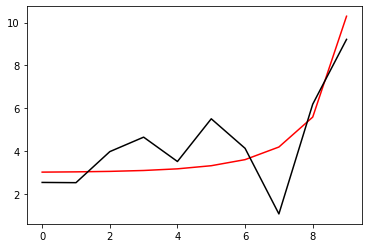

2500 1.0209502589398922
[2.53024437 2.52058837 3.97071177 4.64824574 3.51514227 5.51090744
 4.14151056 1.08163884 6.1991141  9.13757804]


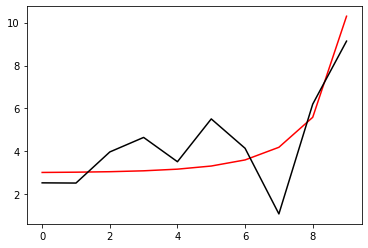

2600 1.0143483280262435
[2.5269774  2.51891281 3.96859617 4.64733387 3.51917138 5.5154823
 4.15692364 1.10186709 6.21104746 9.05886254]


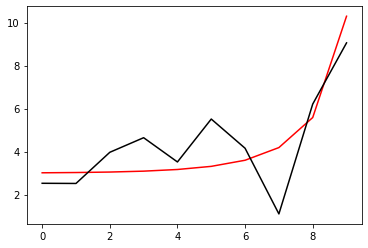

2700 1.0074708256530633
[2.52355438 2.51716296 3.96637923 4.64638097 3.52341662 5.52028967
 4.17308268 1.12304779 6.22357233 8.98097909]


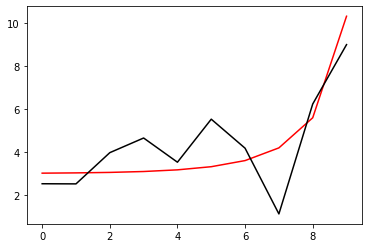

2800 1.0003066257546536
[2.51996884 2.51533564 3.96405653 4.64538531 3.52788755 5.52534079
 4.19001793 1.14521723 6.23671684 8.90395009]


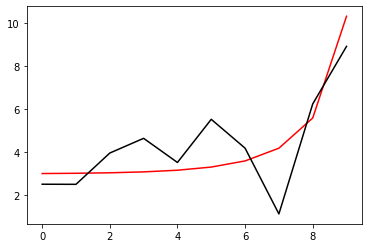

2900 0.9928441215520536
[2.51621406 2.51342749 3.96162339 4.64434505 3.53259411 5.53064752
 4.20776095 1.1684131  6.2505109  8.82780038]


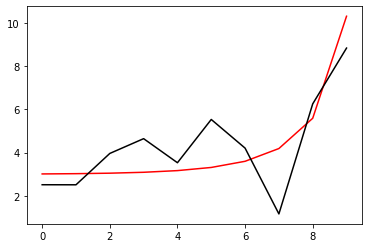

3000 0.9850714051252101
[2.51228312 2.51143508 3.95907491 4.64325822 3.53754667 5.5362223
 4.22634438 1.19267422 6.26498619 8.75255743]


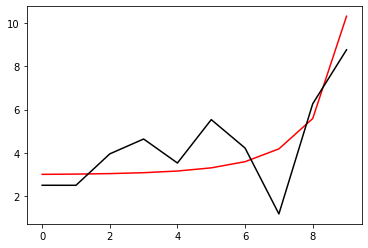

3100 0.976976489507034
[2.50816902 2.50935489 3.95640597 4.64212271 3.54275597 5.54207809
 4.24580172 1.21804015 6.28017601 8.67825161]


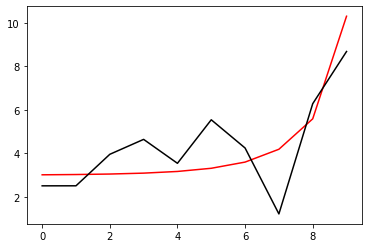

3200 0.9685475752741743
[2.50386472 2.50718342 3.95361129 4.6409363  3.54823312 5.54822825
 4.26616704 1.2445508  6.29611509 8.60491649]


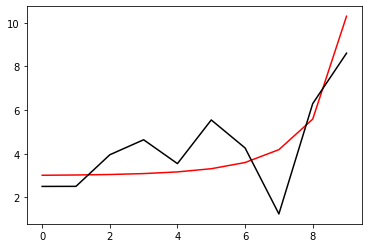

3300 0.9597733620151333
[2.49936331 2.50491725 3.95068547 4.63969661 3.55398951 5.55468643
 4.28747454 1.27224588 6.31283941 8.53258903]


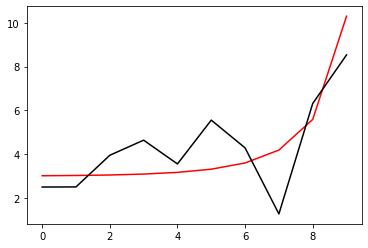

3400 0.9506434029599897
[2.49465807 2.50255313 3.94762298 4.63840118 3.56003681 5.56146642
 4.30975814 1.30116429 6.33038586 8.46130995]


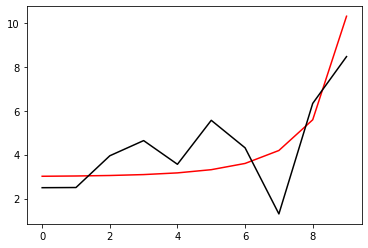

3500 0.9411484984517111
[2.48974266 2.50008809 3.9444183  4.63704738 3.56638689 5.56858199
 4.33305101 1.33134347 6.34879194 8.39112395]


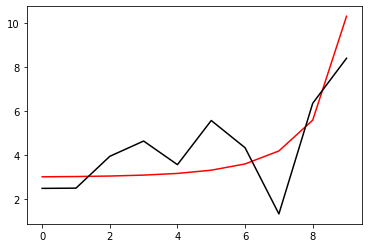

3600 0.9312811208627882
[2.48461126 2.4975195  3.9410659  4.63563248 3.57305175 5.57604664
 4.35738495 1.36281865 6.36809531 8.32208009]


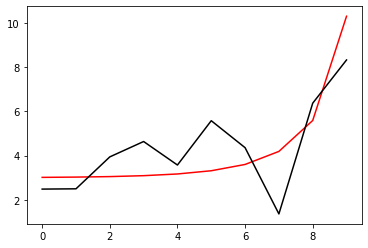

3700 0.9210358601214752
[2.47925871 2.49484526 3.93756032 4.63415361 3.58004346 5.58387342
 4.3827898  1.39562207 6.38833338 8.25423206]


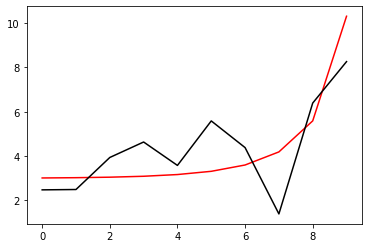

3800 0.910409875405375
[2.47368067 2.49206381 3.93389624 4.63260778 3.58737403 5.59207468
 4.4092928  1.42978214 6.40954274 8.18763858]


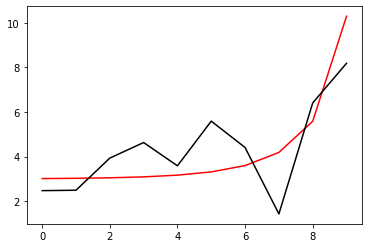

3900 0.8994033350667141
[2.46787382 2.48917434 3.93006853 4.63099185 3.59505537 5.60066176
 4.43691793 1.46532262 6.43175862 8.12236368]


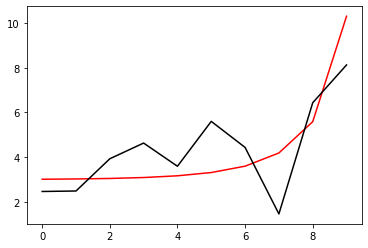

4000 0.8880198238460087
[2.46183598 2.48617683 3.92607231 4.62930252 3.60309916 5.60964477
 4.46568521 1.50226183 6.4550143  8.05847713]


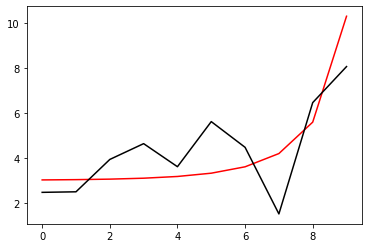

4100 0.8762666943327211
[2.45556629 2.48307221 3.92190298 4.62753633 3.61151674 5.61903228
 4.4956101  1.54061191 6.47934051 7.99605477]


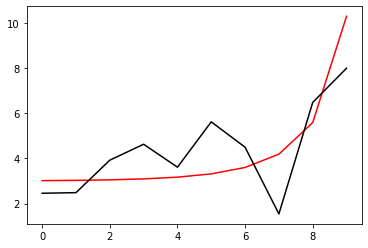

4200 0.8641553388878452
[2.4490653  2.47986239 3.9175563  4.62568964 3.62031902 5.62883107
 4.52670287 1.58037815 6.50476484 7.93517892]


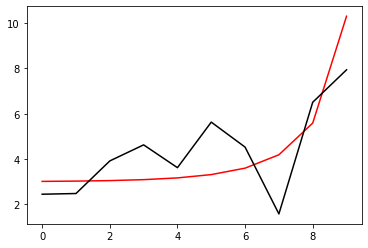

4300 0.8517013592415377
[2.44233514 2.47655037 3.91302836 4.62375861 3.62951637 5.63904587
 4.55896814 1.62155847 6.53131116 7.87593872]


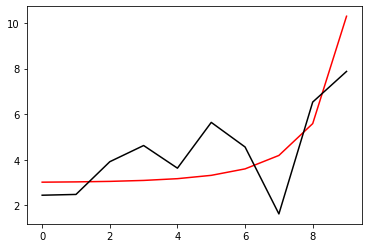

4400 0.8389246139938664
[2.43537952 2.47314028 3.90831566 4.62173913 3.63911855 5.64967915
 4.59240443 1.66414311 6.55899911 7.81843052]


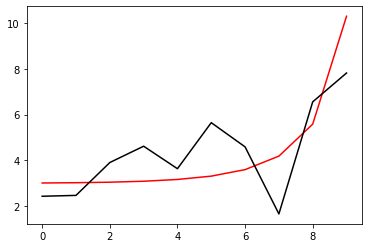

4500 0.8258491293448071
[2.42820383 2.46963741 3.90341508 4.61962688 3.6491346  5.66073093
 4.62700392 1.70811442 6.58784364 7.76275821]


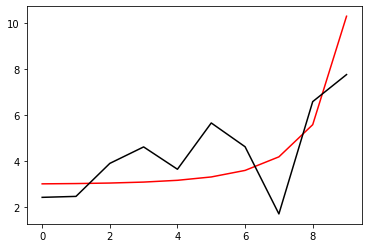

4600 0.8125028653928905
[2.42081514 2.46604818 3.89832388 4.61741719 3.65957279 5.67219865
 4.66275233 1.75344693 6.61785472 7.70903358]


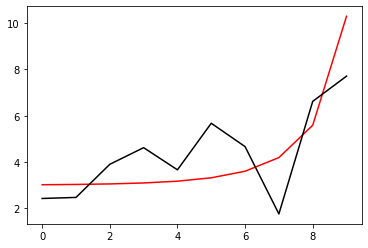

4700 0.7989173388227323
[2.41322213 2.46238013 3.89303965 4.61510512 3.67044054 5.68407709
 4.69962896 1.80010761 6.64903703 7.65737659]


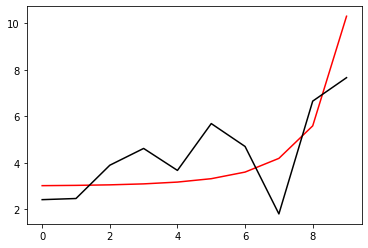

4800 0.7851271120908581
[2.40543505 2.45864187 3.8875603  4.61268533 3.68174444 5.69635839
 4.73760692 1.84805635 6.68138995 7.60791559]


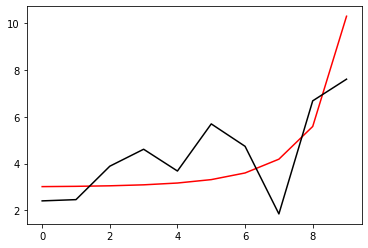

4900 0.771169168525047
[2.39746559 2.45484297 3.88188396 4.61015212 3.69349017 5.70903207
 4.7766535  1.8972467  6.7149075  7.56078744]


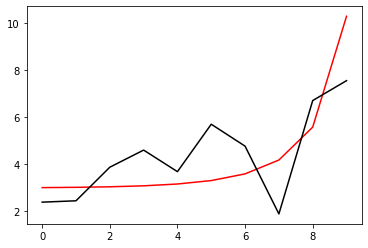

5000 0.7570822013673884
[2.38932674 2.45099384 3.87600894 4.60749936 3.70568257 5.72208516
 4.81673072 1.94762666 6.74957859 7.5161376 ]


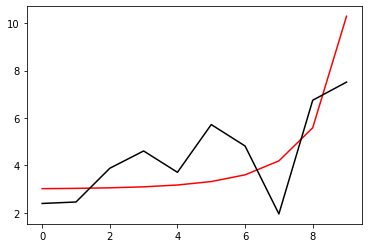

5100 0.742905852394051
[2.38103261 2.44710563 3.86993366 4.60472051 3.71832566 5.73550239
 4.85779602 1.99913974 6.78538728 7.4741199 ]


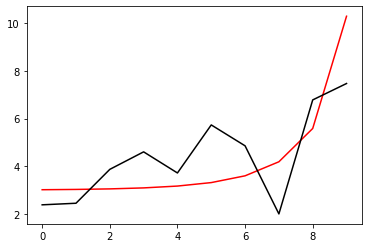

5200 0.7286799430096607
[2.37259825 2.44319005 3.86365654 4.60180855 3.73142263 5.74926642
 4.89980296 2.05172603 6.8223132  7.43489631]


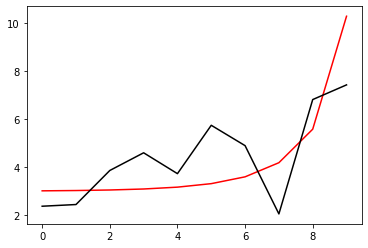

5300 0.7144437505503796
[2.36403949 2.43925926 3.85717592 4.59875601 3.74497596 5.76335807
 4.94270205 2.10532328 6.86033199 7.39863622]


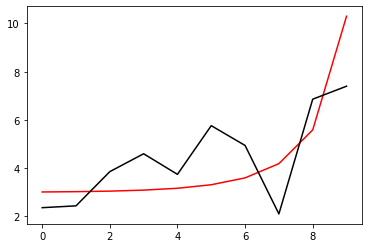

5400 0.700235403102939
[2.35537273 2.43532571 3.85048999 4.59555492 3.75898738 5.77775654
 4.98644147 2.15986791 6.89941586 7.36551558]


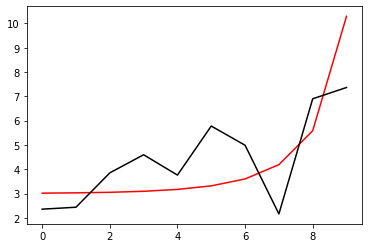

5500 0.6860915185804843
[2.34661496 2.43140207 3.84359674 4.59219674 3.77345781 5.79243942
 5.03096746 2.21529574 6.93953384 7.33571547]


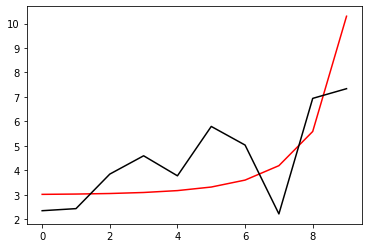

5600 0.6720473524137857
[2.33778394 2.42750127 3.83649382 4.58867219 3.78838703 5.80738228
 5.07622411 2.27154194 6.98065179 7.30942019]


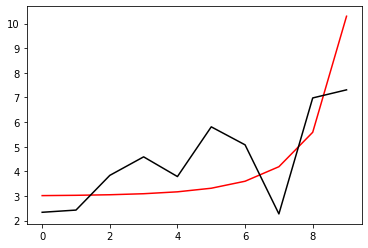

5700 0.6581380840716036
[2.32889905 2.42363687 3.82917852 4.58497071 3.80377266 5.82255684
 5.12215106 2.32853934 7.02273107 7.28681466]


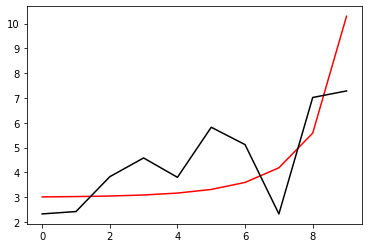

5800 0.644402832472297
[2.31998393 2.41982418 3.82164769 4.58107903 3.81960727 5.8379257
 5.16867649 2.38621224 7.06572413 7.26808086]


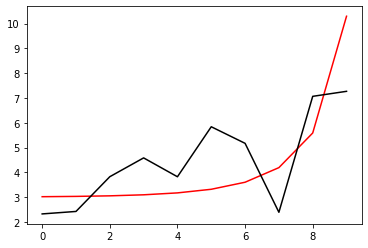

5900 0.6308954706429563
[2.31107367 2.41608357 3.81389741 4.57697725 3.83587055 5.85342737
 5.21569695 2.44445889 7.10956154 7.25339292]


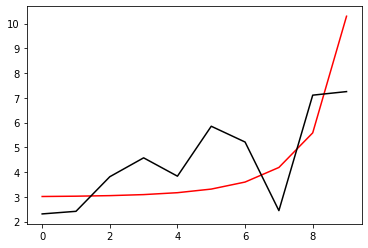

6000 0.6177123813020358
[2.30223406 2.41244928 3.80592234 4.57262806 3.85250797 5.86893568
 5.26302286 2.50310391 7.15411652 7.24290946]


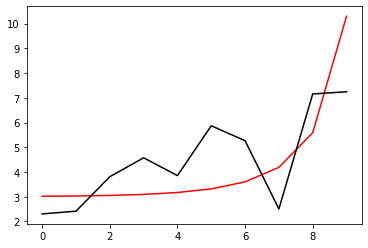

6100 0.6050594956155246
[2.29361202 2.40899212 3.7977132  4.56794775 3.86937431 5.88415178
 5.31023549 2.56177456 7.19911121 7.23675983]


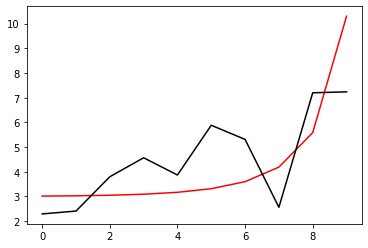

6200 0.5933873114405
[2.28555475 2.40587232 3.78924882 4.5627344  3.88609597 5.89834191
 5.35634519 2.61960801 7.24389244 7.23501564]


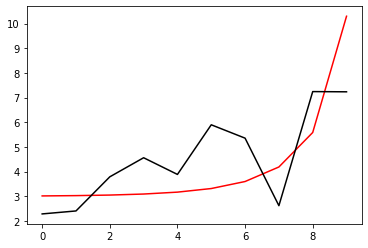

6300 0.5835176720411825
[2.27881529 2.40342611 3.78047339 4.55653022 3.90181678 5.90985778
 5.39918315 2.67474225 7.28703533 7.23762968]


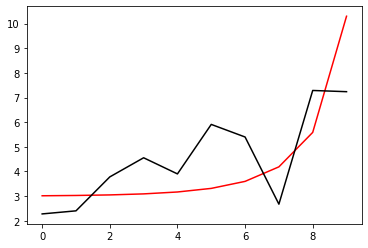

6400 0.5762631408002313
[2.27459471 2.40216705 3.77125877 4.54854384 3.91508462 5.91594145
 5.4352097  2.72420031 7.3262364  7.24433263]


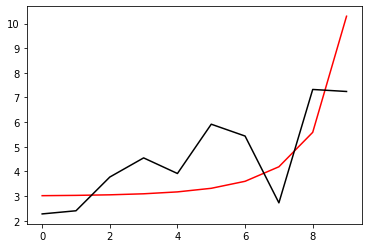

6500 0.571296948996286
[2.27377406 2.40243358 3.76143109 4.53807836 3.92469836 5.91436478
 5.46172521 2.76585152 7.35979936 7.2545702 ]


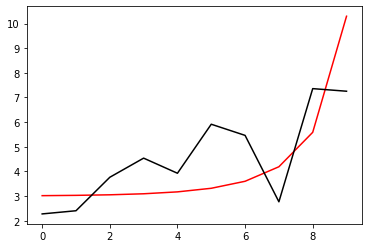

6600 0.5672997554251548
[2.27591271 2.40398754 3.75092058 4.52526353 3.931031   5.90592198
 5.48005355 2.80108768 7.38870487 7.26766408]


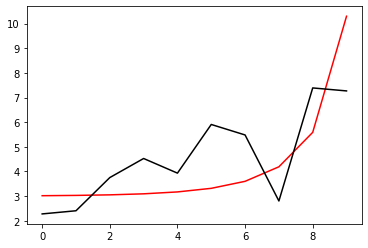

6700 0.5634215860394722
[2.27980698 2.406294   3.73978959 4.5108142  3.93549813 5.89336773
 5.49400625 2.83336479 7.41553717 7.28310599]


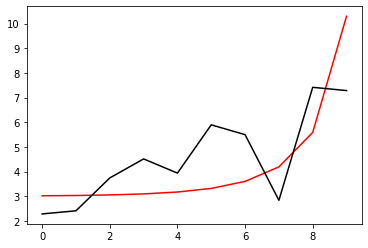

6800 0.5594331167386493
[2.28456414 2.40896971 3.72810901 4.49529935 3.93920161 5.87883438
 5.50648005 2.86525821 7.44224351 7.30065199]


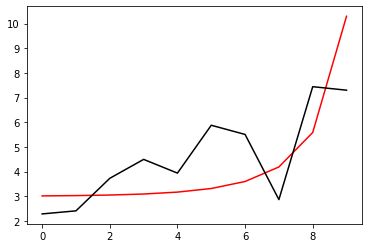

6900 0.5552972513483959
[2.28977853 2.41184173 3.71590816 4.47897758 3.94265165 5.86331983
 5.51883269 2.89797532 7.46974728 7.32022906]


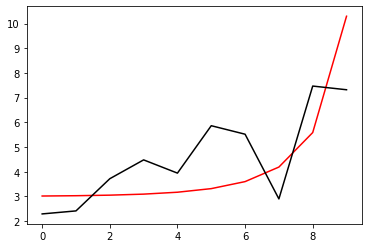

7000 0.551007587602727
[2.29530897 2.41484874 3.70318904 4.46193183 3.94602773 5.84719289
 5.53157707 2.93198307 7.4984149  7.3418367 ]


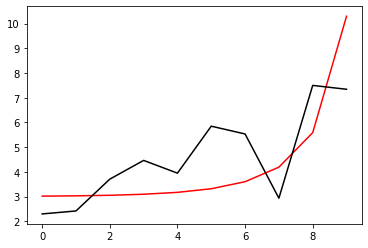

7100 0.5465612852710541
[2.30111698 2.41797234 3.68994261 4.44417621 3.94937912 5.83057811
 5.54489821 2.96746218 7.52839742 7.36549663]


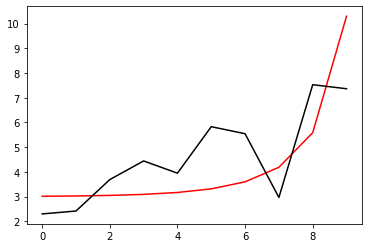

7200 0.5419560794465028
[2.30719814 2.42120817 3.67615633 4.42570229 3.95271103 5.8135209
 5.55887361 3.00449852 7.55977491 7.39123338]


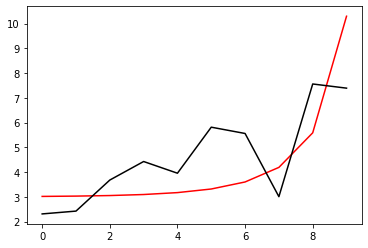

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 10001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

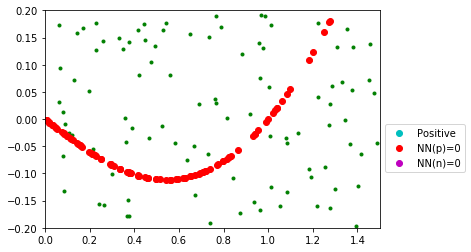

In [54]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()